In [35]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

## Lecture 9 ##

## Prediction ##

In [37]:
families = Table.read_table('family_heights.csv')
families

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


In [39]:
parent_avgs = (families.column('father') + families.column('mother'))/2
parent_avgs

array([ 72.75,  72.75,  72.75,  72.75,  71.  ,  71.  ,  71.  ,  71.  ,
        69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  66.75,
        66.75,  66.75,  66.75,  66.75,  66.75,  71.  ,  71.  ,  71.  ,
        71.  ,  71.  ,  71.  ,  71.  ,  70.25,  70.25,  70.25,  70.25,
        69.75,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,
        68.  ,  67.5 ,  70.  ,  70.  ,  70.  ,  70.  ,  69.75,  69.75,
        69.75,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,
        69.  ,  69.  ,  68.75,  68.75,  68.75,  68.75,  68.75,  68.75,
        68.5 ,  68.5 ,  68.5 ,  68.1 ,  70.85,  70.85,  70.85,  70.85,
        70.85,  70.85,  70.85,  70.85,  70.  ,  70.  ,  70.  ,  69.5 ,
        69.5 ,  69.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,
        68.5 ,  68.75,  68.  ,  68.  ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  68.  ,  68.  ,  68.  ,  67.  ,  67.25,  67.25,
      

In [41]:
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
    'Sex', families.column('sex')
)
heights

Parent Average,Child,Sex
72.75,73.2,male
72.75,69.2,female
72.75,69,female
72.75,69,female
71,73.5,male
71,72.5,male
71,65.5,female
71,65.5,female
69.5,71,male
69.5,68,female


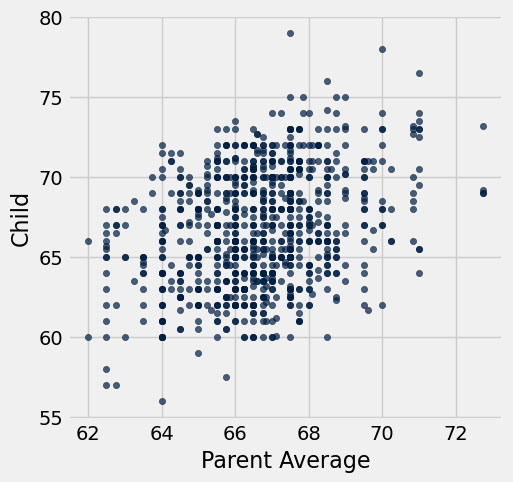

In [43]:
heights.scatter('Parent Average', 'Child')

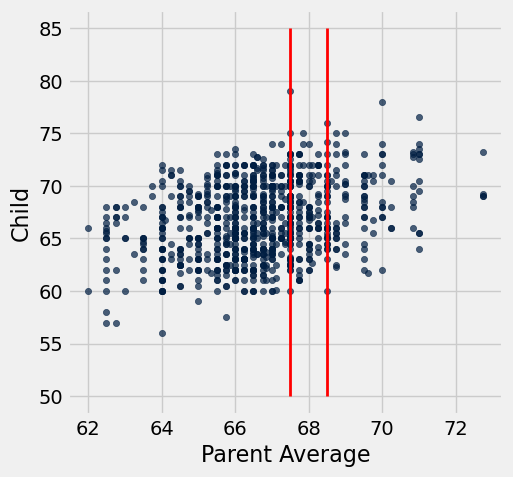

In [45]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [47]:
heights.show(5)

Parent Average,Child,Sex
72.75,73.2,male
72.75,69.2,female
72.75,69,female
72.75,69,female
71,73.5,male


In [49]:
nearby = heights.where("Parent Average", are.between(67.5, 68.5))
nearby_mean = np.average(nearby.column("Child"))
nearby_mean

67.620000000000005

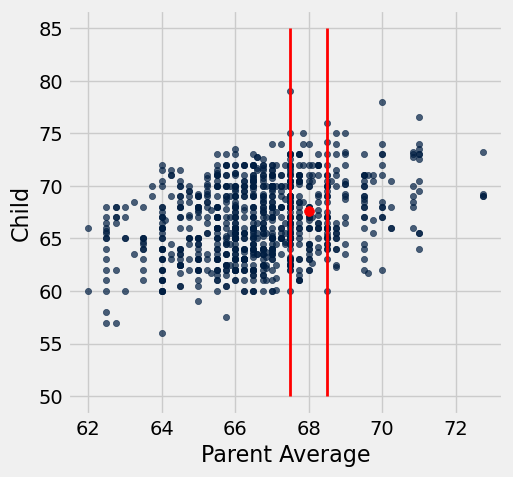

In [51]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [53]:
def predict(h):
    nearby = heights.where("Parent Average", are.between(h - 0.05, h + 0.05))
    return np.average(nearby.column("Child"))

In [55]:
predict(68)

66.69285714285715

In [57]:
predict(64)

64.34615384615384

In [59]:
predict(71)

70.681818181818187

In [61]:
heights

Parent Average,Child,Sex
72.75,73.2,male
72.75,69.2,female
72.75,69,female
72.75,69,female
71,73.5,male
71,72.5,male
71,65.5,female
71,65.5,female
69.5,71,male
69.5,68,female


In [63]:
predicted_heights = heights.apply(predict, "Parent Average")
predicted_heights

array([ 70.1       ,  70.1       ,  70.1       ,  70.1       ,
        70.68181818,  70.68181818,  70.68181818,  70.68181818,
        68.06      ,  68.06      ,  68.06      ,  68.06      ,
        68.06      ,  68.06      ,  68.06      ,  66.484     ,
        66.484     ,  66.484     ,  66.484     ,  66.484     ,
        66.484     ,  70.68181818,  70.68181818,  70.68181818,
        70.68181818,  70.68181818,  70.68181818,  70.68181818,
        67.625     ,  67.625     ,  67.625     ,  67.625     ,
        68.425     ,  66.69285714,  66.69285714,  66.69285714,
        66.69285714,  66.69285714,  66.69285714,  66.69285714,
        66.69285714,  67.49894737,  70.125     ,  70.125     ,
        70.125     ,  70.125     ,  68.425     ,  68.425     ,
        68.425     ,  69.46428571,  69.46428571,  69.46428571,
        69.46428571,  69.46428571,  69.46428571,  69.46428571,
        69.46428571,  69.46428571,  67.45882353,  67.45882353,
        67.45882353,  67.45882353,  67.45882353,  67.45

In [67]:
heights = heights.with_column("Prediction", predicted_heights)
heights

Parent Average,Child,Sex,Prediction
72.75,73.2,male,70.1
72.75,69.2,female,70.1
72.75,69,female,70.1
72.75,69,female,70.1
71,73.5,male,70.6818
71,72.5,male,70.6818
71,65.5,female,70.6818
71,65.5,female,70.6818
69.5,71,male,68.06
69.5,68,female,68.06


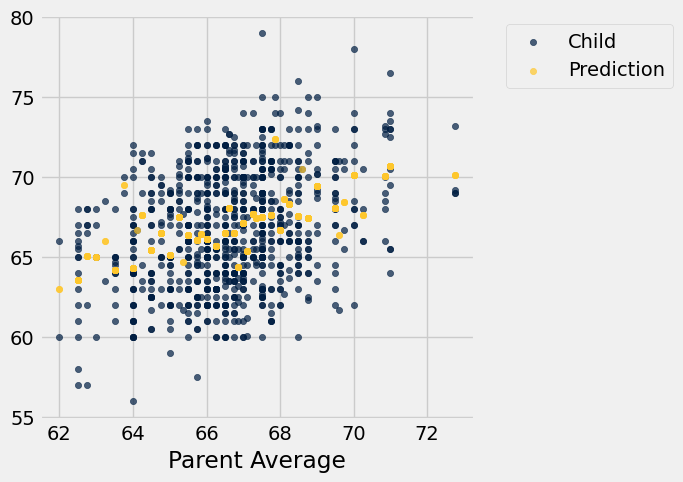

In [69]:
#Visualize Scatterplot of predictions
heights.select('Parent Average', 'Child', 'Prediction')
heights.select('Parent Average', 'Child', 'Prediction').scatter('Parent Average')

## Grouping by One Column ##

In [72]:
cones = Table.read_table('cones.csv')
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [74]:
cones = Table.read_table('cones.csv').drop('Color')
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


In [76]:
cones.group("Flavor")

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [78]:
cones.group("Flavor", np.average)

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


In [80]:
cones.group("Flavor", min)

Flavor,Price min
bubblegum,4.75
chocolate,4.75
strawberry,3.55


## Grouping By One Column: Welcome Survey ##

In [83]:
survey = Table.read_table('welcome_survey_sp24.csv')
survey.show(3)

Year,Extraversion,Number of textees,Hours of sleep,Handedness,Sleep position,Pets,TV,Piercings
Second Year,7,5,7,Right-handed,On your back,a little brother,Black Mirror,3
Second Year,3,6,7,Right-handed,On your right side,Bird,nan,0
Second Year,3,8,6,Right-handed,On your right side,Bird,The Bear,0


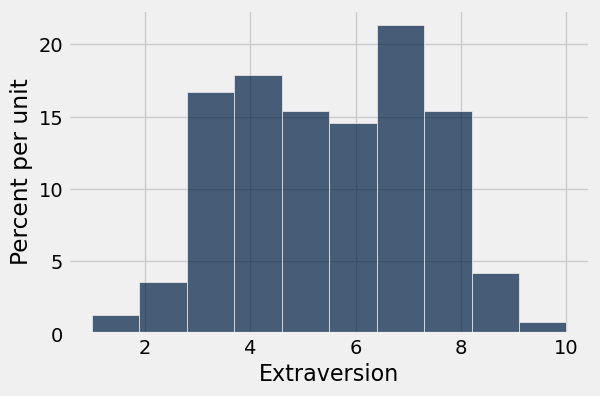

In [85]:
survey.hist('Extraversion')

In [87]:
survey.group("Extraversion")

Extraversion,count
1,11
2,30
3,140
4,150
5,129
6,122
7,179
8,129
9,35
10,7


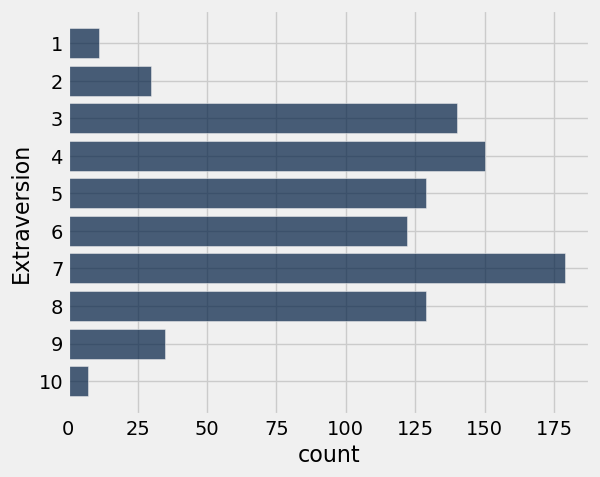

In [89]:
survey.group("Extraversion").barh('Extraversion')

We can do average as well. If we keep all columns in, note that the categorical variables just show up as blank. 

In [91]:
grouped_survey = survey.group("Extraversion", np.average)
grouped_survey.show(3)

Extraversion,Year average,Number of textees average,Hours of sleep average,Handedness average,Sleep position average,Pets average,TV average,Piercings average
1,,3.18182,6.81818,,,,,1.63636
2,,5.36667,7.01667,,,,,1.46667
3,,4.53571,6.95,,,,,2.37857


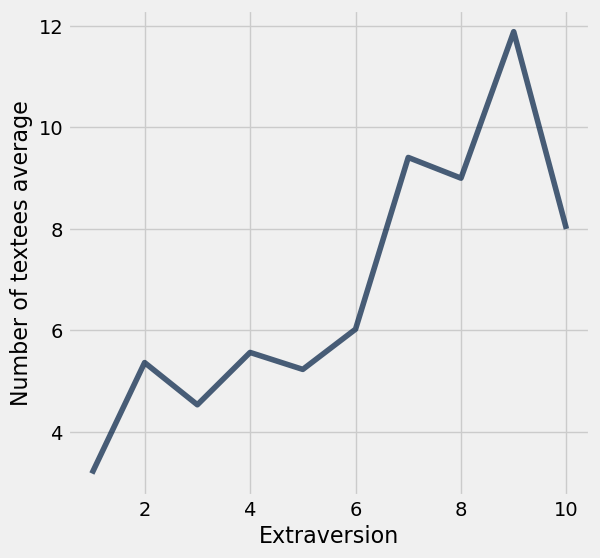

In [93]:
grouped_survey.plot("Extraversion", "Number of textees average")

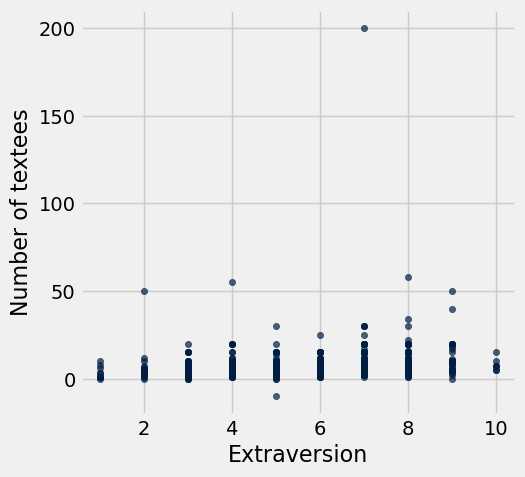

In [95]:
survey.scatter("Extraversion", "Number of textees")

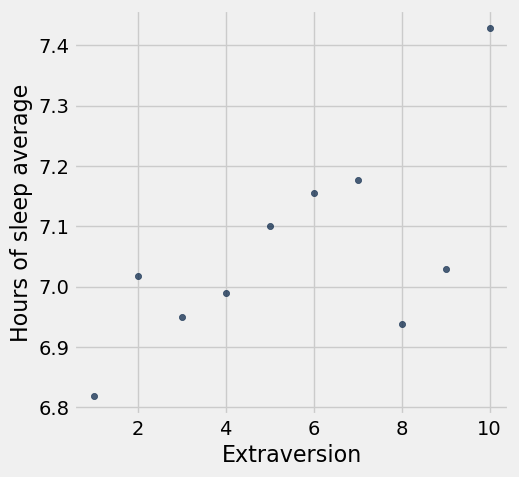

In [97]:
grouped_survey.scatter("Extraversion", "Hours of sleep average")

## Lists

In [100]:
[1, "2", 3, 4]

[1, '2', 3, 4]

In [102]:
t = [1, 'two', Table()]
t

[1, 'two', ]

### Rows from Lists

In [104]:
a = Table().with_columns('Numbers', [1, 2, 3])
a

Numbers
1
2
3


In [106]:
drinks = Table(['Drink', 'Cafe', 'Price'])
drinks

Drink,Cafe,Price


In [108]:
drinks = drinks.with_rows([
    ['Milk Tea', 'Asha', 5.5],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


## Grouping by Two Columns ##

In [111]:
survey.group(["Handedness", "Sleep position"])

Handedness,Sleep position,count
Ambidexterous,On your stomach,1
Ambidextrous,On your back,1
Ambidextrous,On your stomach,1
Cross-dominant,On your back,1
I can write with both but my right hand is much better.,On your right side,1
Left-handed,On your back,23
Left-handed,On your left side,24
Left-handed,On your right side,14
Left-handed,On your stomach,8
Right-handed,On your back,220


In [113]:
survey.group(["Handedness", 5]) 

Handedness,Sleep position,count
Ambidexterous,On your stomach,1
Ambidextrous,On your back,1
Ambidextrous,On your stomach,1
Cross-dominant,On your back,1
I can write with both but my right hand is much better.,On your right side,1
Left-handed,On your back,23
Left-handed,On your left side,24
Left-handed,On your right side,14
Left-handed,On your stomach,8
Right-handed,On your back,220


## Pivot Tables

In [116]:
survey.pivot("Handedness", "Sleep position")

Sleep position,Ambidexterous,Ambidextrous,Cross-dominant,I can write with both but my right hand is much better.,Left-handed,Right-handed,ambidextrous,both
On your back,0,1,1,0,23,220,1,0
On your left side,0,0,0,0,24,226,0,1
On your right side,0,0,0,1,14,294,1,0
On your stomach,1,1,0,0,8,115,0,0


In [118]:
survey.pivot("Handedness", "Sleep position", "Number of textees", min)

Sleep position,Ambidexterous,Ambidextrous,Cross-dominant,I can write with both but my right hand is much better.,Left-handed,Right-handed,ambidextrous,both
On your back,0,15,2,0,0,0,10,0
On your left side,0,0,0,0,2,-10,0,4
On your right side,0,0,0,8,1,0,10,0
On your stomach,9,7,0,0,2,0,0,0


## Discussion Questions

In [120]:
# From the CORGIS Dataset Project
# By Austin Cory Bart acbart@vt.edu
# Version 2.0.0, created 3/22/2016
# https://corgis-edu.github.io/corgis/csv/skyscrapers/

sky = Table.read_table('skyscrapers.csv')
sky = (sky.with_column('age', 2022 - sky.column('completed'))
          .drop('completed'))
sky.show(3)

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,8
Willis Tower,steel,Chicago,442.14,48
432 Park Avenue,concrete,New York City,425.5,7


- 1. For each city, what’s the tallest building for each material?

- 2. For each city, what’s the height difference between the tallest 
steel building and the tallest concrete building?

Maybe a better question, which one of the methods from the first attempt will be easier to work with? for this problem? (Discussion - 1 min)

Don't read ahead until you try the challenge questions yourself first!

pull away here 

In [122]:
sky.select('material', 'city', 'height').group(['city', 'material'], collect=max)

city,material,height max
Atlanta,concrete,264.25
Atlanta,mixed/composite,311.8
Atlanta,steel,169.47
Austin,concrete,208.15
Austin,steel,93.6
Baltimore,concrete,161.24
Baltimore,steel,155.15
Boston,concrete,121.92
Boston,mixed/composite,139
Boston,steel,240.79


In [124]:
sky_p = sky.pivot('material', 'city', values='height', collect=max)
sky_p.show(5)

city,concrete,mixed/composite,steel
Atlanta,264.25,311.8,169.47
Austin,208.15,0,93.6
Baltimore,161.24,0,155.15
Boston,121.92,139,240.79
Charlotte,265.48,239.7,179.23


In [126]:
sky_p = sky_p.with_column(
    'difference', 
    abs(sky_p.column('steel') - sky_p.column('concrete'))
)
sky_p.show(5)

city,concrete,mixed/composite,steel,difference
Atlanta,264.25,311.8,169.47,94.78
Austin,208.15,0,93.6,114.55
Baltimore,161.24,0,155.15,6.09001
Boston,121.92,139,240.79,118.87
Charlotte,265.48,239.7,179.23,86.25


In [128]:
sky_p.sort('difference', True)

city,concrete,mixed/composite,steel,difference
Sunny Isles Beach,196,0,0,196
Las Vegas,350.22,195.68,164.6,185.62
Miami Beach,170.39,0,0,170.39
Pittsburgh,89.3,172,256.34,167.04
Los Angeles,145.7,118.26,310.29,164.59
Philadelphia,157.89,296.73,288.04,130.15
Boston,121.92,139,240.79,118.87
Austin,208.15,0,93.6,114.55
Seattle,138.69,284.38,235.31,96.62
Atlanta,264.25,311.8,169.47,94.78


**Challenge Question**

- Generate a table of the names of the oldest buildings for each material for each city. *Hint: You can use sort to find the name of the oldest building in the dataset*!

In [132]:
sky.sort('age', descending=True).column('name').item(0)

'Statue of Liberty'

In [130]:
def first(s):
    "Return the first element in an array."
    return s.item(0)

(sky
 .sort('age', descending=True)
 .pivot('material', 'city', 'name', first)
)#.where('city', 'San Francisco')

city,concrete,mixed/composite,steel
Atlanta,Westin Peachtree Plaza,One Atlantic Center,FlatironCity
Austin,One American Center,,University of Texas Tower
Baltimore,Charles Towers North Apartments,,Emerson Tower
Boston,Harbor Towers I,Ellison Building,Marriott's Custom House
Charlotte,Bank of America Corporate Center,Hearst Tower,Midtown Plaza
Chicago,The Powhatan,American Furniture Mart,The Rookery
Cincinnati,Kroger Building,Great American Tower at Queen City Square,PNC Tower
Cleveland,National City Center,55 Public Square,Huntington Bank Building
Columbus,Key Bank Building,,Leveque Tower
Dallas,Reunion Tower,Bank of America Plaza,Three AT&T Plaza


## Joins

In [134]:
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [136]:
discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'Asha')
)
discounts

Coupon % off,Location
10,Asha
25,Strada
5,Asha


In [138]:
combined = drinks.join('Cafe', discounts, 'Location')
combined

Cafe,Drink,Price,Coupon % off
Asha,Milk Tea,5.5,10
Asha,Milk Tea,5.5,5
Strada,Espresso,1.75,25
Strada,Latte,3.25,25


In [140]:
discounted_frac = 1 - combined.column('Coupon % off') / 100

In [267]:
combined.with_column(
    'Discounted Price', 
    combined.column('Price') * discounted_frac
)

Cafe,Drink,Price,Coupon % off,Discounted Price
Asha,Milk Tea,5.5,10,4.95
Asha,Milk Tea,5.5,5,5.225
Strada,Espresso,1.75,25,1.3125
Strada,Latte,3.25,25,2.4375


In [263]:
drinks.join('Cafe', drinks, 'Cafe')

Cafe,Drink,Price,Drink_2,Price_2
Asha,Milk Tea,5.5,Milk Tea,5.5
FSM,Espresso,2,Espresso,2
Strada,Espresso,1.75,Espresso,1.75
Strada,Espresso,1.75,Latte,3.25
Strada,Latte,3.25,Espresso,1.75
Strada,Latte,3.25,Latte,3.25
